In [1]:
import numpy as np
import pandas as pd
import re
import html
import os.path
from datetime import datetime as dt
import math

from datetime import date, timedelta

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
st_raw = pd.read_excel('C://Users//yan_m//OneDrive//Desktop//Jupyter//IND5003//Project//data//st_raw_10000_01Oct19.xlsx', header=0, encoding = 'unicode_escape')

In [3]:
st_raw.head()

,Title,st_3SL2gug,st_28bQfzV,st_3xRimaf,lib_XwnOHoV
0,DestroyTheCoiner,"$AMD Then you remember back a bit, with Obama...","Sep 29th, 4:09 pm",1.0,Bullish
1,GoodNewsBull,"$SPY As you know @Bigmoney1977 is afraid of ""r...","Sep 29th, 3:40 pm",1.0,NaN
2,sethmarcus,$UVXY $TVIX $VXX $AAPL $INTC dont miss our lat...,"Sep 29th, 3:29 pm",1.0,NaN
3,GoodNewsBull,"$SPY The Bears were hoping for that ""news""to b...","Sep 29th, 3:23 pm",5.0,NaN
4,calvingrinder,$AAPL I lived through Watergate and followed i...,"Sep 29th, 3:17 pm",1.0,Bullish


In [4]:
st = st_raw.iloc[:,1:4]

In [5]:
st.columns=['message', 'datetime', 'likes']
st.head()

,message,datetime,likes
0,"$AMD Then you remember back a bit, with Obama...","Sep 29th, 4:09 pm",1.0
1,"$SPY As you know @Bigmoney1977 is afraid of ""r...","Sep 29th, 3:40 pm",1.0
2,$UVXY $TVIX $VXX $AAPL $INTC dont miss our lat...,"Sep 29th, 3:29 pm",1.0
3,"$SPY The Bears were hoping for that ""news""to b...","Sep 29th, 3:23 pm",5.0
4,$AAPL I lived through Watergate and followed i...,"Sep 29th, 3:17 pm",1.0


In [6]:
st.likes.fillna(0, inplace = True)
st.head()

,message,datetime,likes
0,"$AMD Then you remember back a bit, with Obama...","Sep 29th, 4:09 pm",1.0
1,"$SPY As you know @Bigmoney1977 is afraid of ""r...","Sep 29th, 3:40 pm",1.0
2,$UVXY $TVIX $VXX $AAPL $INTC dont miss our lat...,"Sep 29th, 3:29 pm",1.0
3,"$SPY The Bears were hoping for that ""news""to b...","Sep 29th, 3:23 pm",5.0
4,$AAPL I lived through Watergate and followed i...,"Sep 29th, 3:17 pm",1.0


Create a time-series

In [7]:
st.datetime = st.datetime.str.replace('th,', '')
st.datetime = st.datetime.str.replace('rd,', '')
st.datetime = st.datetime.str.replace('nd,', '')
st.datetime = st.datetime.str.replace('st,', '')
# can be reduced?

st.datetime = '2019 ' + st.datetime
st.head()

,message,datetime,likes
0,"$AMD Then you remember back a bit, with Obama...",2019 Sep 29 4:09 pm,1.0
1,"$SPY As you know @Bigmoney1977 is afraid of ""r...",2019 Sep 29 3:40 pm,1.0
2,$UVXY $TVIX $VXX $AAPL $INTC dont miss our lat...,2019 Sep 29 3:29 pm,1.0
3,"$SPY The Bears were hoping for that ""news""to b...",2019 Sep 29 3:23 pm,5.0
4,$AAPL I lived through Watergate and followed i...,2019 Sep 29 3:17 pm,1.0


In [8]:
dt.strptime(st.datetime[0],"%Y %b %d %I:%M %p")

datetime.datetime(2019, 9, 29, 16, 9)

In [9]:
st['datetime'] = st['datetime'].apply(lambda x: dt.strptime(x, "%Y %b %d %I:%M %p"))

In [10]:
st.sort_values(by='datetime', ascending=False)

,message,datetime,likes
0,"$AMD Then you remember back a bit, with Obama...",2019-09-29 16:09:00,1.0
1,"$SPY As you know @Bigmoney1977 is afraid of ""r...",2019-09-29 15:40:00,1.0
2,$UVXY $TVIX $VXX $AAPL $INTC dont miss our lat...,2019-09-29 15:29:00,1.0
3,"$SPY The Bears were hoping for that ""news""to b...",2019-09-29 15:23:00,5.0
4,$AAPL I lived through Watergate and followed i...,2019-09-29 15:17:00,1.0
5,Only a matter of time before Trump is on Twitt...,2019-09-29 15:15:00,3.0
6,$AAPL $QQQ $SPY $ES_F $NQ_F \nIt’s time to dra...,2019-09-29 15:14:00,4.0
7,$FB $AMZN $AAPL $NFLX $GOOG \n\nSunday routine...,2019-09-29 14:43:00,2.0
8,$SPY $AAPL $AMZN $FB $TSLA \nThe Barack Obama ...,2019-09-29 14:05:00,17.0
9,$AAPL \nThis is what you can do on today iPad ...,2019-09-29 13:25:00,3.0


In [11]:
st.set_index('datetime', inplace = True)

In [12]:
st.head()

,message,likes
datetime,,
2019-09-29 16:09:00,"$AMD Then you remember back a bit, with Obama...",1.0
2019-09-29 15:40:00,"$SPY As you know @Bigmoney1977 is afraid of ""r...",1.0
2019-09-29 15:29:00,$UVXY $TVIX $VXX $AAPL $INTC dont miss our lat...,1.0
2019-09-29 15:23:00,"$SPY The Bears were hoping for that ""news""to b...",5.0
2019-09-29 15:17:00,$AAPL I lived through Watergate and followed i...,1.0


Cleaning the text message

In [13]:
st['message'] = st['message'].apply(lambda x: html.unescape(x))
st['message'] = st['message'].apply(lambda x: re.sub(r'(www\.|https?://).*?(\s|$)|@.*?(\s|$)|\$.*?(\s|$)|\d|\%|\\|/|-|_', ' ', x))
st['message'] = st['message'].apply(lambda x: re.sub(r'\s+', ' ', x))

Initialize Sentiment Analyzer

In [14]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import csv

In [15]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yan_m\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
# stock market lexicon
stock_lex = pd.read_csv('C://Users//yan_m//OneDrive//Desktop//Jupyter//IND5003//Project//data//stock_lex.csv')

In [17]:
stock_lex['sentiment'] = (stock_lex['Aff_Score'] + stock_lex['Neg_Score'])/2
stock_lex = dict(zip(stock_lex.Item, stock_lex.sentiment))
stock_lex = {k:v for k,v in stock_lex.items() if len(k.split(' '))==1}
stock_lex_scaled = {}
for k, v in stock_lex.items():
    if v > 0:
        stock_lex_scaled[k] = v / max(stock_lex.values()) * 4
    else:
        stock_lex_scaled[k] = v / min(stock_lex.values()) * -4

In [18]:
# Loughran and McDonald
positive = []
with open('C://Users//yan_m//OneDrive//Desktop//Jupyter//IND5003//Project//data//lm_positive.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        positive.append(row[0].strip())
    
negative = []
with open('C://Users//yan_m//OneDrive//Desktop//Jupyter//IND5003//Project//data//lm_negative.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        entry = row[0].strip().split(" ")
        if len(entry) > 1:
            negative.extend(entry)
        else:
            negative.append(entry[0])

In [19]:
final_lex = {}
# final_lex.update({word:2.0 for word in positive})
# final_lex.update({word:-2.0 for word in negative})
final_lex.update(stock_lex_scaled)
final_lex.update(sia.lexicon)
sia.lexicon = final_lex

Conducting the SA

In [20]:
# demonstrating how its used
text = st.message[4]
score = sia.polarity_scores(text)['compound']

print('The text:\"{0}\" has a score of {1}.'.format(text, score))

The text:" I lived through Watergate and followed it closely. Apparently the Trumps are ignorant of history. When you are ignorant of history, knocking down your claims is like shooting fish in a barrel." has a score of -0.4649.


In [21]:
score = sia.polarity_scores(text)
score

{'neg': 0.474, 'neu': 0.269, 'pos': 0.257, 'compound': -0.4649}

In [22]:
st['polarity_score'] = st['message'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [23]:
st.polarity_score = pd.to_numeric(st.polarity_score)

In [24]:
st[st.polarity_score == 0].sample(3)
# notice that all the text with 0 score are gibberish

,message,likes,polarity_score
datetime,,,
2019-09-18 23:01:00,,4.0,0.0
2019-09-11 02:59:00,,3.0,0.0
2019-09-13 01:17:00,,9.0,0.0


In [25]:
st.drop(st[st.polarity_score == 0].index, inplace = True)
st[st.polarity_score == 0]

,message,likes,polarity_score
datetime,,,


In [26]:
st.polarity_score.describe()

count    8381.000000
mean        0.275738
std         0.435324
min        -0.973200
25%        -0.001600
50%         0.302200
75%         0.633700
max         0.995000
Name: polarity_score, dtype: float64

In [27]:
print('{0} number of comments in Stocktwits collected from ({1}) to ({2}) will be processed.'.format(len(st), st.index[0], st.index[-1]))

8381 number of comments in Stocktwits collected from (2019-09-29 16:09:00) to (2019-09-10 21:06:00) will be processed.


Aggregate them into daily

1) just average of them all

In [29]:
sa1 = st.groupby(st.index.date).polarity_score.mean()
# Or however we want to aggregate the data, using MEAN for now

2) Linear weightage for score based on number of like from the comment 

In [33]:
st['likes1'] = st.likes + 1

In [34]:
st['ps2'] = st.polarity_score * st.likes1
st.head()

,message,likes,polarity_score,likes1,ps2
datetime,,,,,
2019-09-29 16:09:00,"Then you remember back a bit, with Obama on a...",1.0,0.8697,2.0,1.7394
2019-09-29 15:40:00,"As you know is afraid of ""risk"" & we all know...",1.0,0.9108,2.0,1.8216
2019-09-29 15:29:00,dont miss our latest State of the Markets vid...,1.0,-0.1125,2.0,-0.2250
2019-09-29 15:23:00,"The Bears were hoping for that ""news""to be re...",5.0,-0.0037,6.0,-0.0222
2019-09-29 15:17:00,I lived through Watergate and followed it clo...,1.0,-0.4649,2.0,-0.9298


In [35]:
sa2 = st.groupby(st.index.date).ps2.sum()  /  st.groupby(st.index.date).likes1.sum()

3) Log weightage for score based on number of like from the comment

In [36]:
st['likes2'] = st.likes1.apply(math.log10)

In [37]:
st['ps2'] = st.polarity_score * st.likes2
st.head()

,message,likes,polarity_score,likes1,ps2,likes2
datetime,,,,,,
2019-09-29 16:09:00,"Then you remember back a bit, with Obama on a...",1.0,0.8697,2.0,0.261806,0.301030
2019-09-29 15:40:00,"As you know is afraid of ""risk"" & we all know...",1.0,0.9108,2.0,0.274178,0.301030
2019-09-29 15:29:00,dont miss our latest State of the Markets vid...,1.0,-0.1125,2.0,-0.033866,0.301030
2019-09-29 15:23:00,"The Bears were hoping for that ""news""to be re...",5.0,-0.0037,6.0,-0.002879,0.778151
2019-09-29 15:17:00,I lived through Watergate and followed it clo...,1.0,-0.4649,2.0,-0.139949,0.301030


In [38]:
sa3 = st.groupby(st.index.date).ps2.sum()  /  st.groupby(st.index.date).likes2.sum()

In [40]:
SA = pd.DataFrame({'Avg':sa1,'Linear':sa2,'Log':sa3})

In [41]:
SA.head()

,Avg,Linear,Log
2019-09-10,0.311241,0.329401,0.323965
2019-09-11,0.347112,0.360686,0.356118
2019-09-12,0.283504,0.294798,0.291032
2019-09-13,0.240032,0.234743,0.242530
2019-09-14,0.311894,0.300874,0.293716


In [42]:
SA.to_csv('C://Users//yan_m//OneDrive//Desktop//Jupyter//IND5003//Project//data//st_sa_01Oct19.csv', index=True)

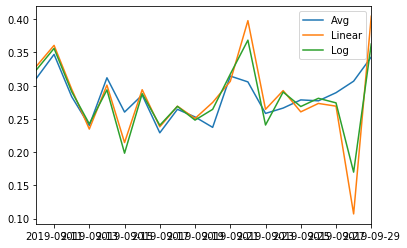

In [43]:
SA.plot()

In [44]:
import yfinance as yf
apple = yf.download('AAPL','2019-09-12', date.today())

[*********************100%***********************]  1 of 1 downloaded


Text(0.5, 1.0, 'Correlation (2019-09-10 to 2019-09-29)')

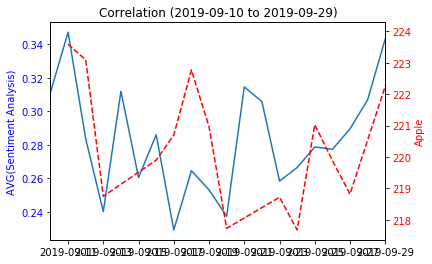

In [49]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(SA.index, SA.Avg)
ax1.set_ylabel('AVG(Sentiment Analysis)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
    
ax2 = ax1.twinx()

ax2.plot(apple.index, apple.Close, 'r--')
ax2.set_ylabel('Apple', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
    
plt.xlim(SA.index[0], SA.index[-1])
plt.title('Correlation ({0} to {1})'.format(SA.index[0], SA.index[-1]))

Text(0.5, 1.0, 'Correlation (2019-09-10 to 2019-09-29)')

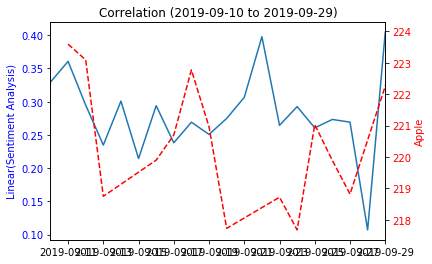

In [50]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(SA.index, SA.Linear)
ax1.set_ylabel('Linear(Sentiment Analysis)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
    
ax2 = ax1.twinx()

ax2.plot(apple.index, apple.Close, 'r--')
ax2.set_ylabel('Apple', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
    
plt.xlim(SA.index[0], SA.index[-1])
plt.title('Correlation ({0} to {1})'.format(SA.index[0], SA.index[-1]))